<a href="https://colab.research.google.com/github/elios-cama/PyTorch_Mnist_dataset/blob/main/Mnist_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torchvision

In [2]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
data_path = 'downloads/'
mnist = datasets.MNIST(data_path, train=True, download=True)
mnist_val = datasets.MNIST(data_path, train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/train-images-idx3-ubyte.gz to downloads/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/train-labels-idx1-ubyte.gz to downloads/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/t10k-images-idx3-ubyte.gz to downloads/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/t10k-labels-idx1-ubyte.gz to downloads/MNIST/raw



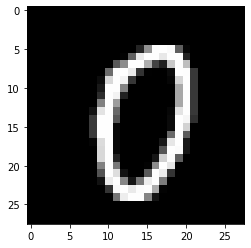

In [4]:
img, label = mnist[1000]
plt.imshow(img, cmap='gray')

In [5]:
mnist = datasets.MNIST(data_path, train=True, download=False, transform=transforms.ToTensor())

In [6]:
imgs = torch.stack([img_t for img_t, _ in mnist], dim=3)

In [7]:
imgs.view(1, -1).mean(dim=1)

tensor([0.1307])

In [8]:
imgs.view(1, -1).std(dim=1)

tensor([0.3081])

In [9]:
mnist = datasets.MNIST(data_path, train=True, download=False, 
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307),
                                               (0.3081))]))

mnist_val = datasets.MNIST(data_path, train=False, download=False, 
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307),
                                               (0.3081))]))

In [10]:
input_size = 784 # ?? 28*28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.LogSoftmax(dim=1))

In [11]:
train_loader = torch.utils.data.DataLoader(mnist, batch_size=64,
                                           shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

n_epochs = 10
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()

        batch_size = imgs.shape[0]
        output = model(imgs.view(batch_size, -1))

        loss = loss_fn(output, labels)

        loss.backward()

        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.210048
Epoch: 1, Loss: 0.416099
Epoch: 2, Loss: 0.162724
Epoch: 3, Loss: 0.409571
Epoch: 4, Loss: 0.332381
Epoch: 5, Loss: 0.181454
Epoch: 6, Loss: 0.191278
Epoch: 7, Loss: 0.109979
Epoch: 8, Loss: 0.041001
Epoch: 9, Loss: 0.069773


In [12]:
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=64,
                                           shuffle=True)


correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.9647
